In [5]:
import fenics as f
import matplotlib.pyplot as plt
from models import velocity_field, t_transport_sim, mesh_2d

----------  Running for dT=0 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


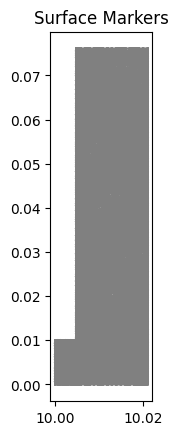

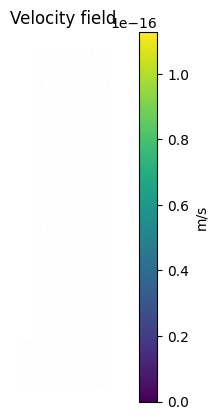

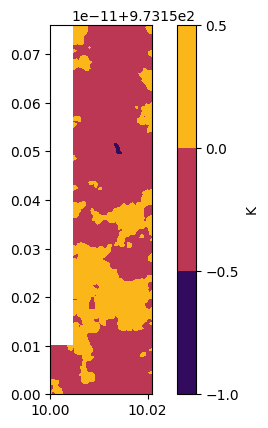

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


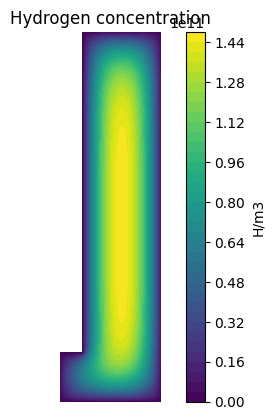

Total surface: 1.22e+01 m2
Total flux: 3.06e+05 H/s/m
Average concentration: 8.46e+10 H/m3
k: 2.97e-07 m/s
(2.9660784579238257e-07, array(8.4588379e+10), 306385.8490080723)
----------  Running for dT=0.1 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


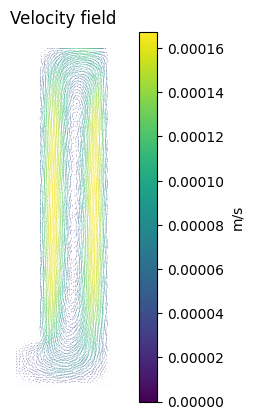

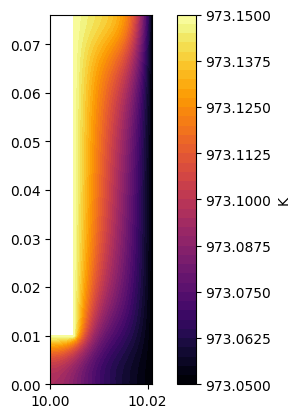

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


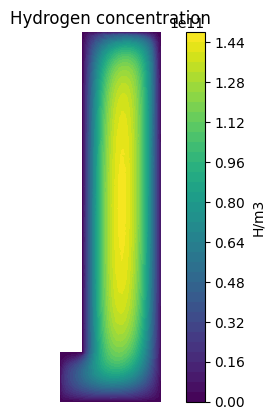

Total surface: 1.22e+01 m2
Total flux: 2.94e+05 H/s/m
Average concentration: 8.13e+10 H/m3
k: 2.96e-07 m/s
(2.9612604413166385e-07, array(8.13056217e+10), 294017.07016451936)
----------  Running for dT=0.2 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


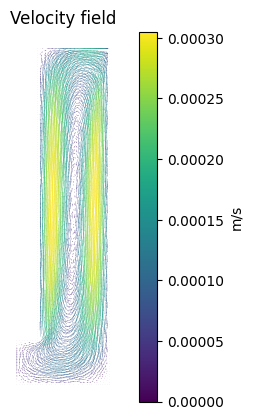

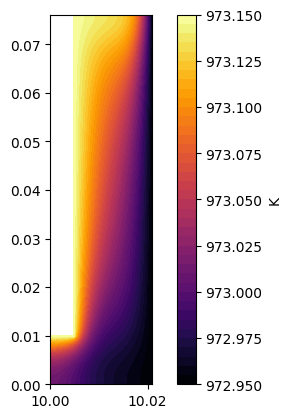

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


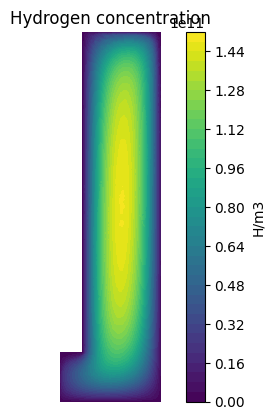

Total surface: 1.22e+01 m2
Total flux: 2.91e+05 H/s/m
Average concentration: 8.07e+10 H/m3
k: 2.95e-07 m/s
(2.948332649936481e-07, array(8.07156106e+10), 290609.21698084916)
----------  Running for dT=0.4 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


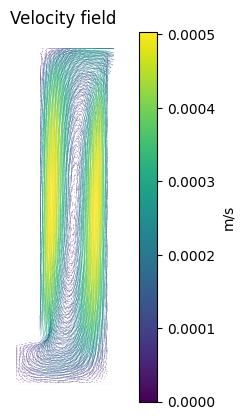

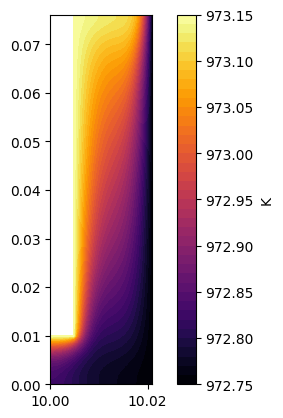

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


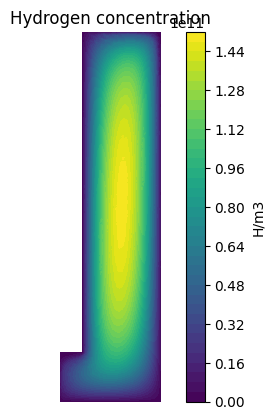

Total surface: 1.22e+01 m2
Total flux: 2.87e+05 H/s/m
Average concentration: 7.99e+10 H/m3
k: 2.94e-07 m/s
(2.9395400601123593e-07, array(7.99374126e+10), 286949.07954758423)
----------  Running for dT=0.8 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


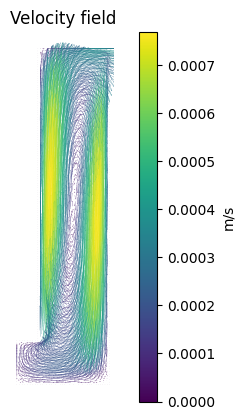

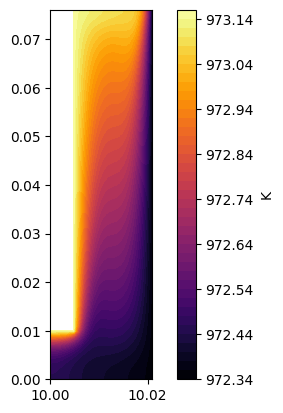

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


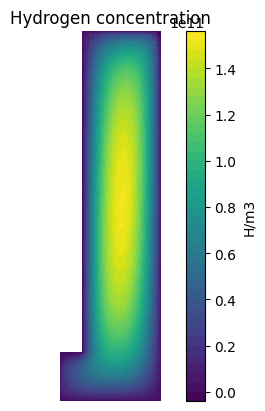

Total surface: 1.22e+01 m2
Total flux: 2.82e+05 H/s/m
Average concentration: 7.92e+10 H/m3
k: 2.91e-07 m/s
(2.9118874040272847e-07, array(7.91987426e+10), 281623.0711783291)
----------  Running for dT=2 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


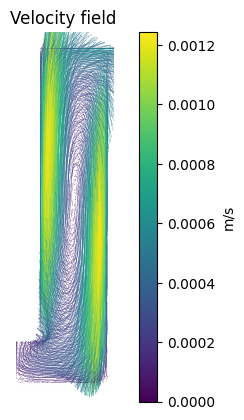

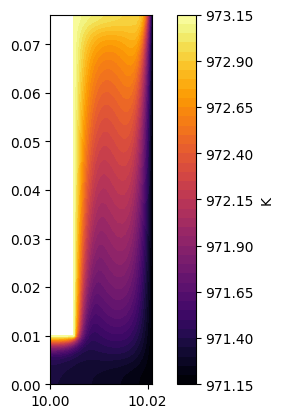

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


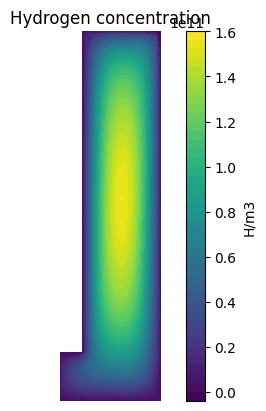

Total surface: 1.22e+01 m2
Total flux: 2.73e+05 H/s/m
Average concentration: 7.81e+10 H/m3
k: 2.87e-07 m/s
(2.8690496101669783e-07, array(7.80534154e+10), 273467.2571837246)
----------  Running for dT=3.5 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


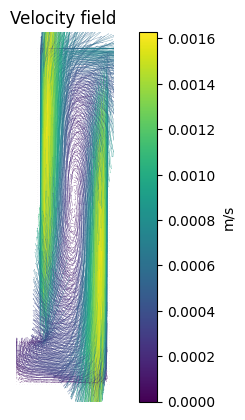

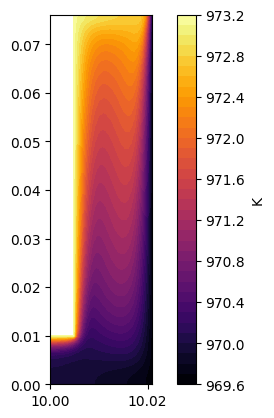

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


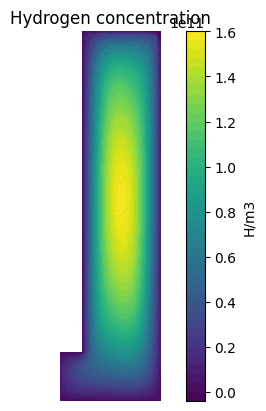

Total surface: 1.22e+01 m2
Total flux: 2.70e+05 H/s/m
Average concentration: 7.67e+10 H/m3
k: 2.88e-07 m/s
(2.880745422606608e-07, array(7.67427864e+10), 269971.4317049667)
----------  Running for dT=10 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


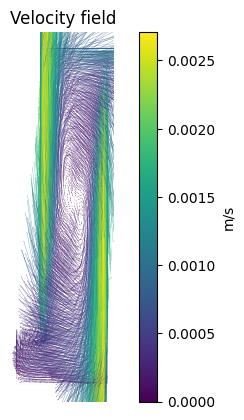

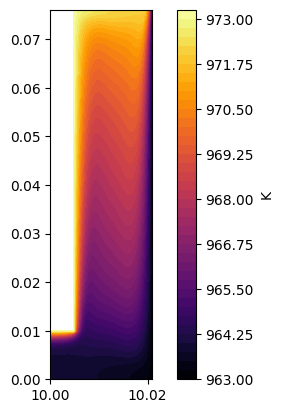

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


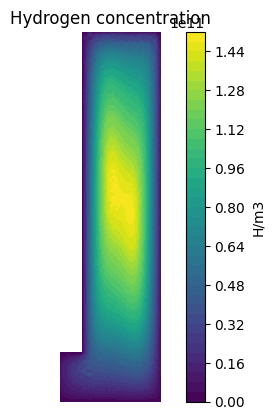

Total surface: 1.22e+01 m2
Total flux: 2.79e+05 H/s/m
Average concentration: 7.18e+10 H/m3
k: 3.19e-07 m/s
(3.186350040136893e-07, array(7.18103747e+10), 279419.06975815666)


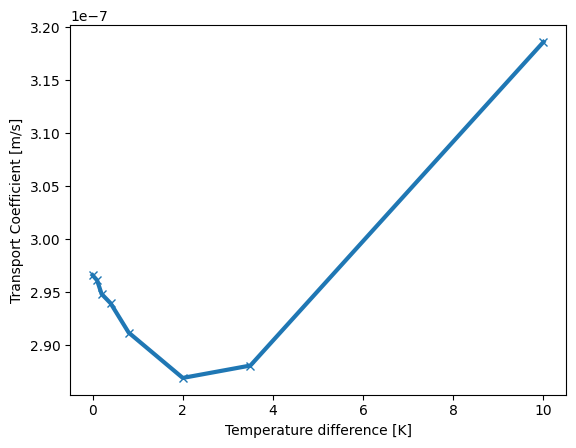

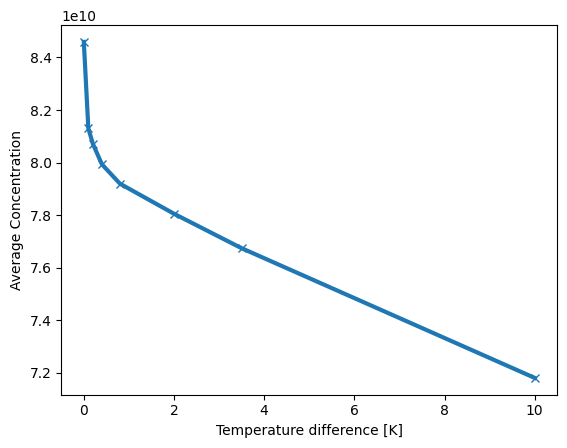

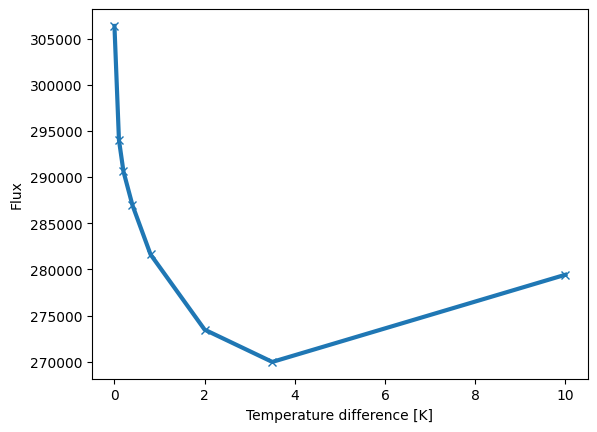

In [6]:
if __name__ == "__main__":
    # Generating mesh
    # x1 = 0.00476
    # x2 = 0.0162
    # y1 = 0.01
    # y2 = 0.0761
    # resolution = 30
    # mesh_fenics, surface_markers, left_id, top_id, right_id, bottom_id, upper_left_id, left_top_id = LMeshmshr(x1, x2, y1, y2, resolution)

    mesh_fenics, volume_markers, surface_markers, correspondance_dict = mesh_2d()

    T_hot = 700 + 273.15
    dt_array = [0, 0.1, 0.2, 0.4, 0.8, 2, 3.5, 10]
    k_array = []
    c_array = []
    f_array = []
    for dT in dt_array:
        print(f"----------  Running for dT={dT} K  ----------")
        foldername = f"Results/dt={dT}/"
        T_cold = T_hot - dT
        u, p, T = velocity_field(
            T_cold=T_cold,
            T_hot=T_hot,
            my_mesh=mesh_fenics,
            surface_markers=surface_markers,
            correspondance_dict=correspondance_dict,
        )

        f.XDMFFile(foldername + "temperature_field.xdmf").write_checkpoint(
            T, "temperature", 1, f.XDMFFile.Encoding.HDF5
        )
        f.XDMFFile(foldername + "velocity_field.xdmf").write(u)

        plt.figure()
        plt.title("Velocity field")
        CS = f.plot(u, scale=1e-3)
        plt.colorbar(CS, label="m/s")
        plt.axis("off")
        plt.show()

        plt.figure()
        TS = f.plot(T, cmap="inferno")
        plt.colorbar(TS, label="K")
        plt.show()

        k = t_transport_sim(
            T,
            mesh_fenics,
            u,
            volume_markers=volume_markers,
            surface_markers=surface_markers,
            correspondance_dict=correspondance_dict,
        )
        print(k)
        k_array.append(k[0])
        c_array.append(k[1])
        f_array.append(k[2])

    plt.figure()
    plt.plot(dt_array, k_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Transport Coefficient [m/s]")

    plt.figure()
    plt.plot(dt_array, c_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Average Concentration")

    plt.figure()
    plt.plot(dt_array, f_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Flux")

    # xdmf_file = XDMFFile("mesh_fencis.xdmf")
    # xdmf_file.write(mesh_fenics)
    # xdmf_file.close()